<a href="https://colab.research.google.com/github/avetodef/modern-data-analysis-tools-itmo/blob/main/%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2_pandas_%D0%A4%D0%B5%D0%B4%D0%BE%D1%82%D1%8C%D0%B5%D0%B2%D0%B0_%D0%A1%D0%BE%D1%84%D1%8C%D1%8F_%D0%A1%D0%98%D0%90%D0%944_1_R32423.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*СИАД 4.1 Федотьева Софья Ивановна R32423*


> **Все задания выполняются только с использвоанием методов `pandas`.**




# Задание 0 (1 балл)

Данные, которые нужно использовать для выполнения задания, возьмите [здесь](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data).

Данные расположены в двух таблицах: **penguins_iter** и **penguins_size**. Для этой лабораторной работы вам понадобится только таблица **penguins_size**.

**penguins_size** содержит следующую информацию:
* `species`: вид, к которому относится пингвин
* `culmen_length_mm`: длина клюва
* `culmen_depth_mm`: глубина клюва
* `flipper_length_mm`: длина ласт
* `body_mass_g`: масса тела
* `island`: название острова, на котором пингвин обитает
* `sex`: пол пингвина



1. Загрузите файл с данными к себе на Гугл диск и подключите его в Google Colab через `mount.drive`.
2. Выведите общую статистику по всем числовым и нечисловым столбцам с помощью метода `describe()`.
3. Узнайте размеры датасета с помощью свойство `shape`.
4. Выведите 4 первые строки датасета.

In [74]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/penguins_size.csv")

In [76]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [77]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


# Задание 1 (1 балл)

1. Узнайте, сколько видов пингвинов представлено в таблице.
2. Посчитайте долю пингвинов каждого вида.
3. Выведите количество пингвинов, обитающих на каждом из островов.

In [78]:
print("number of species: ",data.species.unique().size)

print("\nproportion of penguins of each species:")
print(data.species.value_counts(normalize=True))

print("\namount of penguins on each island:")
print(data.island.value_counts())

number of species:  3

proportion of penguins of each species:
Adelie       0.441860
Gentoo       0.360465
Chinstrap    0.197674
Name: species, dtype: float64

amount of penguins on each island:
Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64


# Задание 2 (1 балл)

1. Найдите id пингвина с самым длинным клювом и с самым коротким. Выведите всю информацию о каждом из этих пингвинов в виде одной таблицы.
2. Посчитайте, насколько самый длинный клюв длиннее самого короткого.

In [79]:
longest_id = data["culmen_length_mm"].idxmax()
print("id of the penguin with the longest culmen:", longest_id)

id of the penguin with the longest culmen: 253


In [80]:
data[data.culmen_length_mm == data.culmen_length_mm.max()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
253,Gentoo,Biscoe,59.6,17.0,230.0,6050.0,MALE


In [81]:
shortest_id = data["culmen_length_mm"].idxmin()
print("id of the penguin with the shortest culmen:", shortest_id)

id of the penguin with the shortest culmen: 142


In [82]:
data[data.culmen_length_mm == data.culmen_length_mm.min()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
142,Adelie,Dream,32.1,15.5,188.0,3050.0,FEMALE


In [83]:
longest = data.culmen_length_mm.max()
shortest = data.culmen_length_mm.min()

print("longest culmen is more than a shortest by:", longest-shortest)

longest culmen is more than a shortest by: 27.5


# Задание 3 (1 балл)

1. Постройте корреляционную матрицу для значений столбцов `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm`, `body_mass_g`. 
2. Результат покажите на тепловой карте (heatmap). Требуется построить график, а не раскрасить получившуюся в первом пункте таблицу.

correlation martix:
                    culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
culmen_length_mm           1.000000        -0.235053           0.656181   
culmen_depth_mm           -0.235053         1.000000          -0.583851   
flipper_length_mm          0.656181        -0.583851           1.000000   
body_mass_g                0.595110        -0.471916           0.871202   

                   body_mass_g  
culmen_length_mm      0.595110  
culmen_depth_mm      -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000  

heatmap:



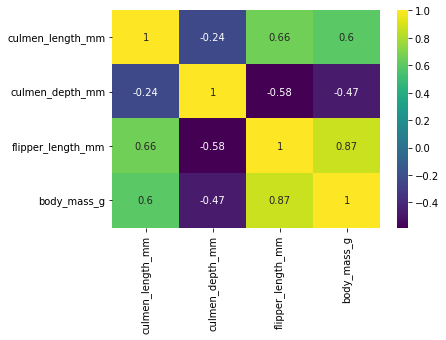

In [84]:
import seaborn as sns
corr = data.loc[:, ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr()
print('correlation martix:\n',corr)
print("\nheatmap:\n")
sns.heatmap(corr, annot = True, cmap = "viridis")

# Задание 4 (2 балла)

1. О пингвинах какого вида в таблице больше всего недостающих данных? (Строк с `NaN`)
2. Какой информации о пингвинах чаще всего не хватает?

In [85]:
least_info_species = data.isnull().groupby([data['species']]).sum().sum(axis=1).idxmax()
least_info_column = data.isnull().sum().idxmax()
print("the least info is about species:", least_info_species)
print("\nthe least info is about column:", least_info_column)

the least info is about species: Adelie

the least info is about column: sex


# Задание 5 (2 балла)

1. По данным из таблицы узнайте, равномерно ли демографиески (процент мужских и женских особей) пингвины распределены по каждому из островов. Считаем, что равномерно, если разница составляет не более 3%.
2. Результат покажите на столбиковой диаграмме.

In [86]:
df = data[data.sex != "."]
demographics_data = df.groupby(["island", "sex"])["species"].count()

demographics_data

island     sex   
Biscoe     FEMALE    80
           MALE      83
Dream      FEMALE    61
           MALE      62
Torgersen  FEMALE    24
           MALE      23
Name: species, dtype: int64

In [87]:
result = []

for i in range (0, 6, 2):
  sum = demographics_data[i] + demographics_data[i+1]
  row = []
  row.append(demographics_data[i]/sum)
  row.append(demographics_data[i+1]/sum)
  result.append(row)

result

[[0.49079754601226994, 0.50920245398773],
 [0.4959349593495935, 0.5040650406504065],
 [0.5106382978723404, 0.48936170212765956]]

In [88]:
demogr_data_percent = pd.DataFrame(result,columns = ["FEMALE", "MALE"], index = ["Biscoe", "Dream", "Torgersen"])
demogr_data_percent

,FEMALE,MALE
Biscoe,0.490798,0.509202
Dream,0.495935,0.504065
Torgersen,0.510638,0.489362


распределены равномерно

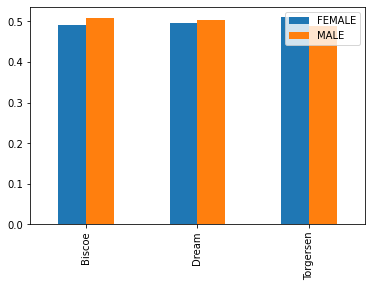

In [89]:
demogr_data_percent.plot(kind = "bar")

  # Задание 6 (2 балла)

1. Считая, что длина плавника пингвина составляет треть его роста, рассчитайте индекс массы тела каждого пингвина. Определите самый крупный вид.
2. В каком количестве популяция этого вида представлена на каждом из островов? Результат покажите на круговой диаграмме.

In [92]:
#GOOD PART.

bmi_arr = []
def calc_bmi(peng_info):
  height = peng_info["flipper_length_mm"] * 3 * 1000
  weight = peng_info["body_mass_g"] * 1000
  bmi = weight/height**2
  bmi_arr.append(bmi)

data.apply(calc_bmi, axis = 1)


1.5260712035286705e-05